In [1]:
# Data manipulation
import numpy as np 
import pandas as pd 
from PIL import Image

# Text manipulation
from string import punctuation
#from stop_words import get_stop_words
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer

# NLP Module
import nltk
from nltk import word_tokenize
from nltk import WordNetLemmatizer
from nltk.corpus import stopwords

In [2]:
# Path of folders where data are stored
#DATA_PATH = "data/"
FIG_PATH = "fig/"

__Please note that when you see commented code, it is code that might be useful at a moment, but do not focus on it or try to make it works if not asked to.__

# Hands ON 1

## Load Data

In [3]:
# Try to name your data / dataframe explicitly. 
file_name = "reviews.csv"
#file_path = DATA_PATH + file_name

# Reading data
scrapped_data = pd.read_csv(file_name)

In [4]:
scrapped_data.head()

title                user_loc  \
0                                               “OK”  London, United Kingdom   
1                                   “Boys night out”  London, United Kingdom   
2                                 “A new beginning ”  London, United Kingdom   
3                     “We decided to try as we read”  London, United Kingdom   
4  “Fantastic. A well deserved Michelin star for ...           Viby, Denmark   

               date                       restaurant  rate  \
0  27 December 2019        Desi Flavours london ltd    3.0   
1  30 December 2019        Desi Flavours london ltd    5.0   
2  26 November 2019        Desi Flavours london ltd    5.0   
3   2 February 2020                          Lentil    5.0   
4   7 November 2019   Tony Parkin at The Tudor Room    5.0   

                                              review  
0  Visited in December 2019. Good ambiance, good ...  
1  Nice food..We really enjoyed ourselves..it was...  
2  First time in this restaurant since the new ow...  
3  We decided to try as we read the reviews. Well...  
4  We had at fantastic dinner at the Tudor room. ...

In [5]:
# scrapped_data = pd.read_json(DATA_PATH + "scrapped_data", lines=True)

# import json_lines
# json_data = []
# with open(DATA_PATH + "raw_review_london.jl", 'rb') as f:
#     reader = json_lines.reader(f)
#     for line in reader:
#         try:
#             json_data.append(line)
#         except:
#             pass
        
# scrapped_data = pd.DataFrame.from_records(json_data)
# print(scrapped_data.shape)

In [6]:
# Getting a better format for the date
scrapped_data['date'] = pd.to_datetime(scrapped_data['date'])

In [7]:
scrapped_data.head()

title                user_loc  \
0                                               “OK”  London, United Kingdom   
1                                   “Boys night out”  London, United Kingdom   
2                                 “A new beginning ”  London, United Kingdom   
3                     “We decided to try as we read”  London, United Kingdom   
4  “Fantastic. A well deserved Michelin star for ...           Viby, Denmark   

        date                       restaurant  rate  \
0 2019-12-27        Desi Flavours london ltd    3.0   
1 2019-12-30        Desi Flavours london ltd    5.0   
2 2019-11-26        Desi Flavours london ltd    5.0   
3 2020-02-02                          Lentil    5.0   
4 2019-11-07   Tony Parkin at The Tudor Room    5.0   

                                              review  
0  Visited in December 2019. Good ambiance, good ...  
1  Nice food..We really enjoyed ourselves..it was...  
2  First time in this restaurant since the new ow...  
3  We decided to try as we read the reviews. Well...  
4  We had at fantastic dinner at the Tudor room. ...

In [8]:
# Take only a limited number of our reviews to increase speed / reduce process time
# You may want to start with low number of rows to see if your code works, and then increase this number to perform
# relevant and global analysis

# With sample you can specify a raw value of number of rows you want 
scrapped_data = scrapped_data.sample(3000)

# Or you can specify a fraction of initial rows
# scrapped_data = scrapped_data.sample(frac=0.1)

## Explore Data

Personal comment: maybe it would have been more optmimal to use title of reviews rather than reviews because they express main ideas in sorter formats

In [9]:
scrapped_data.sample()

title                user_loc       date         restaurant  \
2283  “Cozy Restaurant”  Port Dickson, Malaysia 2020-01-11   Sowa Restaurant    

      rate                                             review  
2283   4.0  Had an enjoyable evening meal at the Restauran...

In [10]:
# Import useful visualisation librairies
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
print(scrapped_data.shape)
scrapped_data.tail()

(3000, 6)


title                  user_loc       date  \
1789  “Great staff, food and atmosphere”    London, United Kingdom 2013-08-05   
3707                “An excellent lunch”    London, United Kingdom 2019-12-16   
3348      “A Shinning Light in Richmond”    London, United Kingdom 2020-01-14   
1661  “Lovely Food - Pleasant Ambience.”  Cheshire, United Kingdom 2019-07-27   
3687            “Refreshingly different”    London, United Kingdom 2018-02-10   

                            restaurant  rate  \
1789   Afternoon Tea at Great Fosters    4.0   
3707    Tony Parkin at The Tudor Room    5.0   
3348    Sebastian's Italian, Richmond    4.0   
1661                         Sorrento    4.0   
3687                           Doosra    5.0   

                                                 review  
1789  Lovely family afternoon (my husband, 22 months...  
3707  Lovely dining room. Quiet but not isolating ev...  
3348  Visited for an early dinner on New Year's Eve ...  
1661  Booked for dinner with the family (5 adults an...  
3687  Excellent addition to the restaurants in the a...

In [12]:
scrapped_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 2462 to 3687
Data columns (total 6 columns):
title         3000 non-null object
user_loc      2935 non-null object
date          3000 non-null datetime64[ns]
restaurant    3000 non-null object
rate          3000 non-null float64
review        3000 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 164.1+ KB


In [13]:
# dataframe.describe only describes numeric columns
scrapped_data.describe()

rate
count  3000.000000
mean      4.499000
std       0.961756
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000

## Feature Engineering

In [14]:
# Create useful columns/features
data = scrapped_data

In [15]:
data['day_of_week'] = data['date'].dt.day

In [16]:
data['len_review'] = data['review'].apply(len)

## Some visualisations

In [17]:
# What do you want to observe quickly ? 

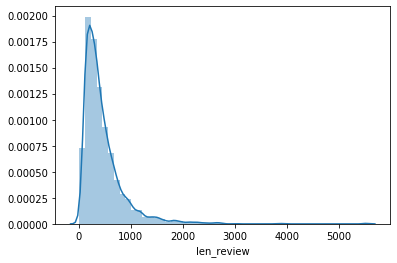

In [18]:
# Plotting the length of reviews
sns.distplot(data['len_review'])

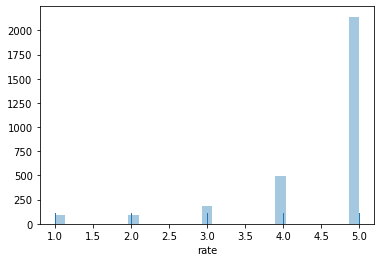

In [19]:
# Plotting the distribution of grades
sns.distplot(data['rate'], kde=False, rug=True)

711


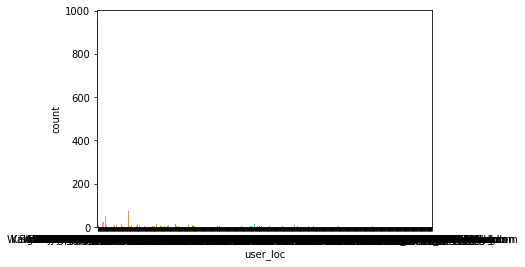

In [20]:
# Trying to explore the relevancy of geographic origin -> way too many locations, with various formats 
print(data['user_loc'].nunique())
sns.countplot(data=data, x='user_loc')

In [21]:
# To go further : How to see if the rating associated with the review is related to the length of the comment?

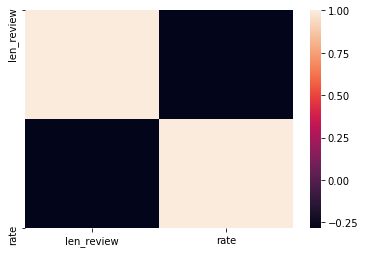

In [22]:
# Correlation matrix
corr = data[['len_review', 'rate']].corr()
sns.heatmap(corr)

## Work on reviews

### Preprocessing

In [23]:
#! pip install unidecode

In [24]:
reviews = data['review'].tolist()

In [25]:
len(reviews)

3000

In [26]:
import pandas as pd
import nltk
import unidecode

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/victoiredetermont/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/victoiredetermont/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
# Homework function #1 

import pandas as pd
import nltk
import unidecode
from nltk.corpus import stopwords

def basic_cleaning(sentence):
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(unidecode.unidecode(sentence.lower()))
    tokens = [tok for tok in tokens if tok[-1].isalpha() and tok not in stop_words]
    return tokens

In [28]:
# Doing it for our dataframe 

df = pd.read_csv('reviews.csv')
reviews = df['review'].apply(lambda s: basic_cleaning(s)).values

In [29]:
len(reviews)

3969

In [30]:
# Visualizing the head of our dataframe
df.head()

title                user_loc  \
0                                               “OK”  London, United Kingdom   
1                                   “Boys night out”  London, United Kingdom   
2                                 “A new beginning ”  London, United Kingdom   
3                     “We decided to try as we read”  London, United Kingdom   
4  “Fantastic. A well deserved Michelin star for ...           Viby, Denmark   

               date                       restaurant  rate  \
0  27 December 2019        Desi Flavours london ltd    3.0   
1  30 December 2019        Desi Flavours london ltd    5.0   
2  26 November 2019        Desi Flavours london ltd    5.0   
3   2 February 2020                          Lentil    5.0   
4   7 November 2019   Tony Parkin at The Tudor Room    5.0   

                                              review  
0  Visited in December 2019. Good ambiance, good ...  
1  Nice food..We really enjoyed ourselves..it was...  
2  First time in this restaurant since the new ow...  
3  We decided to try as we read the reviews. Well...  
4  We had at fantastic dinner at the Tudor room. ...

___
___

__<font color='red'>
   Do not go further during Hands On 1, work on your visualizations instead !! 
</font>__
 
___
___

# Hands On 2

## Stemming

In [31]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/victoiredetermont/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
# Testing for the first sentence of our dataset 

lema_vector_0 = []
for word in reviews[0]:
    lema_vector_0.append(lemmatizer.lemmatize(word))
#lema_vector_0

In [33]:
# Testing our future function on a small data set and without the format of a function

reviews_trunc = reviews[:10]

lemmatizer = WordNetLemmatizer()
list_words = [[]]*len(reviews_trunc)
for i in np.arange(len(reviews_trunc)):
    list_words[i]=[]
    for word in reviews_trunc[i]:
        list_words[i].append(lemmatizer.lemmatize(word))
#list_words

In [34]:
reviews_trunc[:2]

array([list(['visited', 'december', 'good', 'ambiance', 'good', 'service', 'polite', 'staff', 'food', 'reason', 'desi', 'flavour', 'lack', 'desi', 'tadka', 'mild', 'salt', 'spices', 'tandoori', 'fish', 'salt', 'less', 'spice', 'less', 'garnishing', 'hope', 'improvise']),
       list(['nice', 'food..we', 'really', 'enjoyed', 'ourselves..it', 'boys', 'night', 'sons', 'would', 'visit'])],
      dtype=object)

In [35]:
# Defining our function to generalize our observations, not splitting between sentences 

def lemmatize_review(token):
    lemmatizer = WordNetLemmatizer()
    list_words = [[]]*len(token)
    for i in np.arange(len(token)):
        for word in token[i]:
            list_words[i].append(lemmatizer.lemmatize(word))
    return list_words

In [36]:
# Defining our function to generalize our observations if we want to keep our function sentence by sentence 

def lemmatize_review(token):
    lemmatizer = WordNetLemmatizer()
    list_words = [[]]*len(token)
    for i in np.arange(len(token)):
        list_words[i]=[]
        for word in token[i]:
            list_words[i].append(lemmatizer.lemmatize(word))
    return list_words

In [37]:
lemmatize_review(reviews_trunc)

[['visited',
  'december',
  'good',
  'ambiance',
  'good',
  'service',
  'polite',
  'staff',
  'food',
  'reason',
  'desi',
  'flavour',
  'lack',
  'desi',
  'tadka',
  'mild',
  'salt',
  'spice',
  'tandoori',
  'fish',
  'salt',
  'le',
  'spice',
  'le',
  'garnishing',
  'hope',
  'improvise'],
 ['nice',
  'food..we',
  'really',
  'enjoyed',
  'ourselves..it',
  'boy',
  'night',
  'son',
  'would',
  'visit'],
 ['first',
  'time',
  'restaurant',
  'since',
  'new',
  'owner',
  'taken',
  'warm',
  'welcome',
  'staff',
  'accessible',
  'menu',
  'changed',
  'believe',
  'better',
  'popadoms',
  'start',
  'house',
  'nice',
  'ordered',
  'onion',
  'bhajis',
  'start',
  'lamb',
  'curry',
  'rice',
  'sag',
  'aloo',
  'served',
  'piping',
  'hot',
  'delicious',
  'outstanding',
  'food',
  'outstanding',
  'service',
  'return',
  'visit',
  'back',
  'town'],
 ['decided',
  'try',
  'read',
  'review',
  'well',
  "'s",
  'total',
  'u',
  'staff',
  'friendly',

In [38]:
# Sarah
#def lemmatize_review(tokens):
    #lemmatizer = WordNetLemmatizer()
    #return reviews.apply(lambda x: [lemmatizer.lemmatize(x[i]) for i in range(len(x))])

___
___

__<font color='red'>
    Do not go further during Hands On 2, explore different stemmer/lemmatizer and their paramters instead !
</font>__
 
___
___

# Hands On 3

## Bag of Words

In [39]:
# We want to encode words to have 0 and 1 on every line 
# Link to have more information : https://chrisalbon.com/machine_learning/preprocessing_text/bag_of_words/

In [40]:
sentences = []

for sentence in reviews:
    sentences.append( ' '.join(str(x) for x in sentence))

In [41]:
sentences[:2]

['visited december good ambiance good service polite staff food reason desi flavour lack desi tadka mild salt spices tandoori fish salt less spice less garnishing hope improvise',
 'nice food..we really enjoyed ourselves..it boys night sons would visit']

In [42]:
len(sentences)

3969

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = sentences

vectorizer = CountVectorizer()
#bag_of_words = vectorizer.fit_transform(corpus).todense()

# Other technique : build an array and then transform it into a matrix 
bag_of_words = vectorizer.fit_transform(corpus)

print(bag_of_words.shape) # we obtain the good len but we dont want so many columns 
print(df.shape)
print(bag_of_words.toarray())
#print( vectorizer.vocabulary_ )

(3969, 12001)
(3969, 6)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [44]:
#print( vectorizer.vocabulary_ )

## Putting everything into a single dataframe (using CountVectorizer and not TFIDF)

In [45]:
# Get feature names
feature_names = vectorizer.get_feature_names()

# View feature names
feature_names[:10]

['00pm', '09p', '0ny', '0xa', '10', '100m', '1030pm', '10fold', '10m', '10oz']

In [46]:
# Create data frame that we want to concatenate with our existing dataframe 
df_bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns=feature_names)
df_bag_of_words.head()

00pm  09p  0ny  0xa  10  100m  1030pm  10fold  10m  10oz  ...  zingy  \
0     0    0    0    0   0     0       0       0    0     0  ...      0   
1     0    0    0    0   0     0       0       0    0     0  ...      0   
2     0    0    0    0   0     0       0       0    0     0  ...      0   
3     0    0    0    0   0     0       0       0    0     0  ...      0   
4     0    0    0    0   0     0       0       0    0     0  ...      0   

   zipped  zizi  zizzi  zone  zsuzsu  zucchini  zuma  zumba  zvi  
0       0     0      0     0       0         0     0      0    0  
1       0     0      0     0       0         0     0      0    0  
2       0     0      0     0       0         0     0      0    0  
3       0     0      0     0       0         0     0      0    0  
4       0     0      0     0       0         0     0      0    0  

[5 rows x 12001 columns]

In [47]:
# We dont want to many lines, so we have to find the words that are the most frequently used ones 
from collections import Counter
from itertools import chain

number = 100 # number of words that we want to keep

counter = Counter(chain(*reviews)).most_common(number)
#counter

In [48]:
# Extracting the words that we want to keep

list_words =[]
for x in counter:
    list_words.append(x[0])
#list_words

In [49]:
# Selecting only the columns with those words in a new dataframe 

#df_bag_of_words_shorten = df_bag_of_words[list_words]
#df_bag_of_words_shorten.head()

cols = [col for col in df_bag_of_words.columns if col in list_words]
df_bag_of_words_shorten = df_bag_of_words[cols]
print(df_bag_of_words_shorten.shape) # checking that we still have the right number of lines
df_bag_of_words_shorten.head()

(3969, 97)


also  always  amazing  area  atmosphere  attentive  back  bar  best  bit  \
0     0       0        0     0           0          0     0    0     0    0   
1     0       0        0     0           0          0     0    0     0    0   
2     0       0        0     0           0          0     1    0     0    0   
3     0       0        1     0           0          0     1    0     0    0   
4     0       0        0     0           0          0     1    0     0    0   

   ...  value  visit  visited  welcome  welcoming  well  went  wine  \
0  ...      0      0        1        0          0     0     0     0   
1  ...      0      1        0        0          0     0     0     0   
2  ...      0      1        0        1          0     0     0     0   
3  ...      0      0        0        0          0     1     0     0   
4  ...      0      0        0        0          0     0     0     1   

   wonderful  would  
0          0      0  
1          0      1  
2          0      0  
3          0      0  
4          0      0  

[5 rows x 97 columns]

In [50]:
# Concatenating our two dataframe now that we have extracted only the information we need 

df_full = pd.concat([df, df_bag_of_words_shorten], axis=1, sort=False)
df_full.head()

title                user_loc  \
0                                               “OK”  London, United Kingdom   
1                                   “Boys night out”  London, United Kingdom   
2                                 “A new beginning ”  London, United Kingdom   
3                     “We decided to try as we read”  London, United Kingdom   
4  “Fantastic. A well deserved Michelin star for ...           Viby, Denmark   

               date                       restaurant  rate  \
0  27 December 2019        Desi Flavours london ltd    3.0   
1  30 December 2019        Desi Flavours london ltd    5.0   
2  26 November 2019        Desi Flavours london ltd    5.0   
3   2 February 2020                          Lentil    5.0   
4   7 November 2019   Tony Parkin at The Tudor Room    5.0   

                                              review  also  always  amazing  \
0  Visited in December 2019. Good ambiance, good ...     0       0        0   
1  Nice food..We really enjoyed ourselves..it was...     0       0        0   
2  First time in this restaurant since the new ow...     0       0        0   
3  We decided to try as we read the reviews. Well...     0       0        1   
4  We had at fantastic dinner at the Tudor room. ...     0       0        0   

   area  ...  value  visit  visited  welcome  welcoming  well  went  wine  \
0     0  ...      0      0        1        0          0     0     0     0   
1     0  ...      0      1        0        0          0     0     0     0   
2     0  ...      0      1        0        1          0     0     0     0   
3     0  ...      0      0        0        0          0     1     0     0   
4     0  ...      0      0        0        0          0     0     0     1   

   wonderful  would  
0          0      0  
1          0      1  
2          0      0  
3          0      0  
4          0      0  

[5 rows x 103 columns]

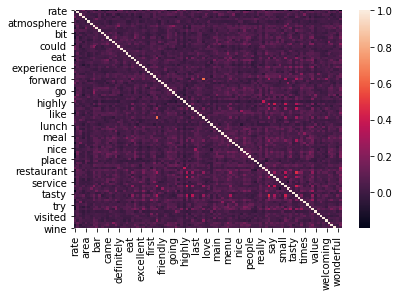

In [51]:
# Doing a correlation matching the words and the ratings 
# Correlation matrix
corr = df_full.corr()
sns.heatmap(corr)

In [52]:
# grouping by rate 
df_rate = df_full.groupby(['rate']).mean()
df_rate = df_rate[df_rate.columns[:10]]
print(df_rate.shape)
df_rate

(5, 10)


also    always   amazing      area  atmosphere  attentive      back  \
rate                                                                            
1.0   0.244094  0.141732  0.007874  0.110236    0.047244   0.007874  0.330709   
2.0   0.252033  0.081301  0.016260  0.073171    0.154472   0.048780  0.325203   
3.0   0.156780  0.105932  0.033898  0.088983    0.144068   0.042373  0.275424   
4.0   0.139063  0.126562  0.040625  0.106250    0.148438   0.085938  0.226562   
5.0   0.137531  0.169891  0.199085  0.072810    0.168484   0.093211  0.238129   

           bar      best       bit  
rate                                
1.0   0.181102  0.125984  0.031496  
2.0   0.170732  0.089431  0.178862  
3.0   0.118644  0.127119  0.186441  
4.0   0.084375  0.109375  0.168750  
5.0   0.051706  0.203306  0.040450

## TFIDF

In [53]:
# You can use your own function to vectorize (TF or TF-IDF), but it is recommened to use libraries when possible.
# It is way more scalable and lot of functionnalities are implemented

In [54]:
contents = sentences

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(contents)
feature_names = vectorizer.get_feature_names()
dense = tfidf_matrix.todense()
denselist = dense.tolist()
df_word_bis = pd.DataFrame(denselist, columns=feature_names)
df_word_bis.head()

00pm  09p  0ny  0xa   10  100m  1030pm  10fold  10m  10oz  ...  zingy  \
0   0.0  0.0  0.0  0.0  0.0   0.0     0.0     0.0  0.0   0.0  ...    0.0   
1   0.0  0.0  0.0  0.0  0.0   0.0     0.0     0.0  0.0   0.0  ...    0.0   
2   0.0  0.0  0.0  0.0  0.0   0.0     0.0     0.0  0.0   0.0  ...    0.0   
3   0.0  0.0  0.0  0.0  0.0   0.0     0.0     0.0  0.0   0.0  ...    0.0   
4   0.0  0.0  0.0  0.0  0.0   0.0     0.0     0.0  0.0   0.0  ...    0.0   

   zipped  zizi  zizzi  zone  zsuzsu  zucchini  zuma  zumba  zvi  
0     0.0   0.0    0.0   0.0     0.0       0.0   0.0    0.0  0.0  
1     0.0   0.0    0.0   0.0     0.0       0.0   0.0    0.0  0.0  
2     0.0   0.0    0.0   0.0     0.0       0.0   0.0    0.0  0.0  
3     0.0   0.0    0.0   0.0     0.0       0.0   0.0    0.0  0.0  
4     0.0   0.0    0.0   0.0     0.0       0.0   0.0    0.0  0.0  

[5 rows x 12001 columns]

## WordClouds

In [55]:
# Define a mask for wordcloud
image = Image.open(FIG_PATH + "plate_bis.jpg")

# We transform our image into a mask
plate_mask = np.array(image)

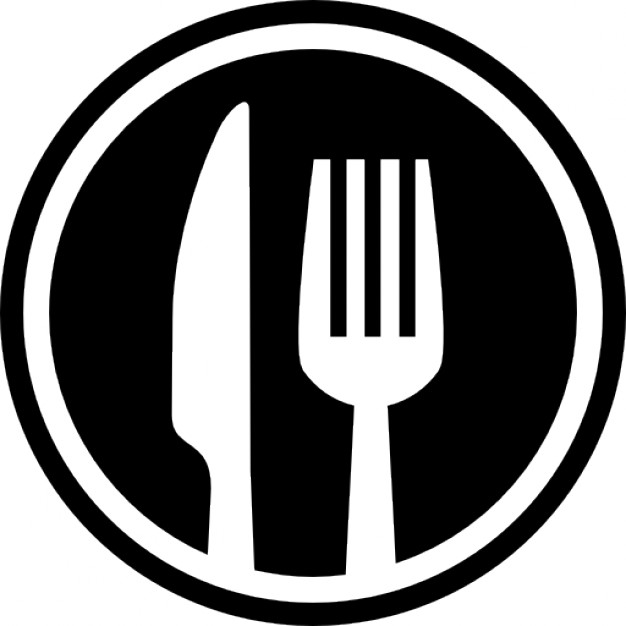

In [56]:
# We want our words to appear into this image 
image

In [57]:
# Information about our dataset
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 3969 observations and 6 features in this dataset. 



In [58]:
# Groupby by origin
location = df.groupby("user_loc")

# Summary statistic of all countries
location.describe().head()

rate                                      \
                                count      mean       std  min   25%  50%   
user_loc                                                                    
Abu Dhabi, United Arab Emirates   3.0  3.333333  2.081666  1.0  2.50  4.0   
Acton, United Kingdom             1.0  5.000000       NaN  5.0  5.00  5.0   
Addlestone, United Kingdom        2.0  4.500000  0.707107  4.0  4.25  4.5   
Adelaide, Australia               1.0  5.000000       NaN  5.0  5.00  5.0   
Aldershot, United Kingdom         1.0  5.000000       NaN  5.0  5.00  5.0   

                                            
                                  75%  max  
user_loc                                    
Abu Dhabi, United Arab Emirates  4.50  5.0  
Acton, United Kingdom            5.00  5.0  
Addlestone, United Kingdom       4.75  5.0  
Adelaide, Australia              5.00  5.0  
Aldershot, United Kingdom        5.00  5.0

In [59]:
# Looking for the most represented words in our reviews
#words_reviews

In [60]:
# Showing that lemmatizer has some limits 
print(lemmatizer.lemmatize('visitors'))
print(lemmatizer.lemmatize('visited'))

visitor
visited


In [61]:
# not useful

words_reviews = lemmatize_review(reviews_trunc)

text_list = []
for i in np.arange(len(words_reviews)):
    text_list = text_list + words_reviews[i]

In [62]:
# Extracting all our unique words from the reviews 

words_reviews = lemmatize_review(reviews_trunc)

text_list = []
for i in np.arange(len(words_reviews)):
    text_list = text_list + words_reviews[i]

output = []
for x in text_list:
    if x not in output:
        output.append(x)
print(output[:20])

['visited', 'december', 'good', 'ambiance', 'service', 'polite', 'staff', 'food', 'reason', 'desi', 'flavour', 'lack', 'tadka', 'mild', 'salt', 'spice', 'tandoori', 'fish', 'le', 'garnishing']


In [63]:
# Function to count the number of occurrences in a list
def countX(lst, x): 
    count = 0
    for ele in lst: 
        if (ele == x): 
            count = count + 1
    return count 

In [64]:
# Generating "text" out of our list of words 

# Generating a single vector of words and not vector of vectors of words (one by sentence)
text_list = []
for i in np.arange(len(words_reviews)):
    text_list = text_list + words_reviews[i]

# Generating our text format
text = ' '.join(str(x) for x in text_list)

# Printing only the first 100th characters of the new text to check the format 
print(text[:100])

visited december good ambiance good service polite staff food reason desi flavour lack desi tadka mi


In [65]:
from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(plate_mask)

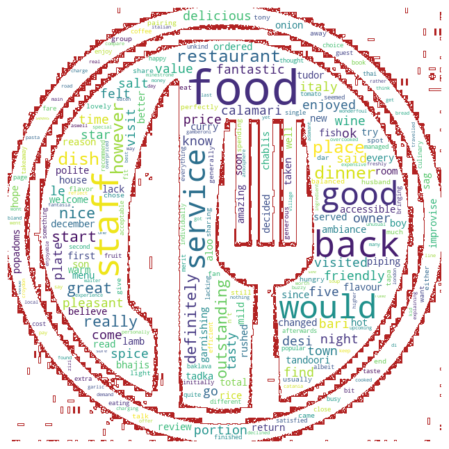

In [66]:
# Cloud 
stop_words = set(stopwords.words("english"))

wc = WordCloud(background_color="white", 
    max_words=1000, mask=plate_mask, stopwords=stop_words, contour_width=1, contour_color='firebrick').generate(text)


# show
plt.figure(figsize=[8,8])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [67]:
# Looking at the most common words in our extract of reviews : long version 

# Create an empty dictionary 
d = dict() 
word_name = []
word_count = []

# Counting the number of occurences for each word
for word in text_list: 
        # Check if the word is already in dictionary 
        if word in d: 
            # Increment count of word by 1 
            d[word] = d[word] + 1
        else: 
            # Add the word to dictionary with count 1 
            d[word] = 1

# Print the contents of dictionary 
for key in list(d.keys()): 
    # to extract information to get a graph afterwards 
    word_name.append(key)
    word_count.append(d[key])
    # to verifying intuitively that our algorithms are correct
    #print(key, ":", d[key]) 

In [68]:
# Very short method for the same selection
from collections import Counter
from itertools import chain
Counter(chain(*words_reviews)).most_common(20)

[('food', 11),
 ('staff', 6),
 ('back', 6),
 ('good', 5),
 ('would', 5),
 ('service', 4),
 ('restaurant', 4),
 ('dinner', 4),
 ('dish', 4),
 ('however', 4),
 ('place', 4),
 ('nice', 3),
 ('really', 3),
 ('start', 3),
 ('outstanding', 3),
 ('definitely', 3),
 ('great', 3),
 ('visited', 2),
 ('desi', 2),
 ('salt', 2)]

      word_name  word_count
7          food          11
6         staff           6
63         back           6
2          good           5
30        would           5
..          ...         ...
109        away           1
110       still           1
111      hungry           1
113         dar           1
259  ingredient           1

[260 rows x 2 columns]


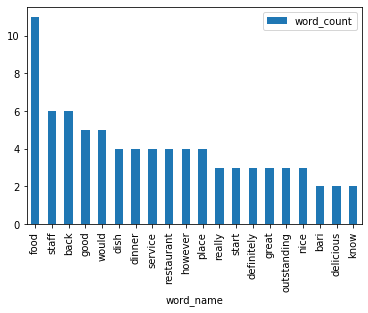

In [69]:
# Building our dataframe
d = {'word_name': word_name, 'word_count': word_count}
df = pd.DataFrame(data=d)

# Soring values to know which words are used the most in reviews
df = df.sort_values('word_count', ascending=False)
print(df)

# Do a barplot of the 20th most used words in reviews 
df_reccurent_words = df[:20]
df_reccurent_words.plot.bar(x='word_name', y='word_count')
# this confirms the wordcloud as words are sized the same way in the cloud and in the barplot

In [70]:
from collections import Counter
from itertools import chain
Counter(chain(*words_reviews)).most_common(20)

[('food', 11),
 ('staff', 6),
 ('back', 6),
 ('good', 5),
 ('would', 5),
 ('service', 4),
 ('restaurant', 4),
 ('dinner', 4),
 ('dish', 4),
 ('however', 4),
 ('place', 4),
 ('nice', 3),
 ('really', 3),
 ('start', 3),
 ('outstanding', 3),
 ('definitely', 3),
 ('great', 3),
 ('visited', 2),
 ('desi', 2),
 ('salt', 2)]

## Function from corpus to wordcloud

In [71]:
import matplotlib
import pandas
import wordcloud

In [72]:
# Homework function 2 

def from_corpus_to_word_cloud(text_column):
    stop_words = set(stopwords.words("english"))
    wc = WordCloud(background_color="white", 
    max_words=1000, stopwords=stop_words, contour_width=1, contour_color='firebrick').generate(text_column)
    
    plt.figure(figsize=[10,5])
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    return wc


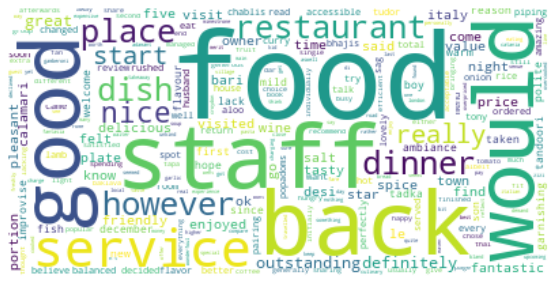

In [73]:
from_corpus_to_word_cloud(text)

# Homeworks

For homework you are asked to code 2 functions : 
- A function that do the basic cleaning of a corpus
- A function that creates a wordcloud from a cleaned corpus

Bonus : Be creative about text visualisations, and on how to get relevant insights from your reviews